In [ ]:
print("      ")

sairam


Import the required libraries

In [2]:
#Data pre-processing
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

#Imputer
# import the KNNimputer class
from sklearn.impute import KNNImputer

#Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

#ANN
import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score

#Oversampling
from imblearn.over_sampling import SMOTE

#Misc
from collections import Counter
import math

pd.set_option('display.max_rows', 250)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()

e:\TMLC\RTSA\tmlc_env\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



2.10.0


Read the data

In [3]:
data = pd.read_csv('train_qWM28Yl.csv')
print(f"Number of data points {data.shape[0]}")
print(f"Number of features    {data.shape[1]}")

Number of data points 58592
Number of features    44


Descriptive stats on data

In [4]:
data.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [6]:
data.describe(include='O').T

,count,unique,top,freq
policy_id,58592,58592,ID00001,1
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526


In [7]:
data.isnull().mean()

policy_id                           0.0
policy_tenure                       0.0
age_of_car                          0.0
age_of_policyholder                 0.0
area_cluster                        0.0
population_density                  0.0
make                                0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
gear_box                            0.0
steering_type                       0.0


No missing values

EDA

In [8]:
data['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

Highly imbalanced dataset

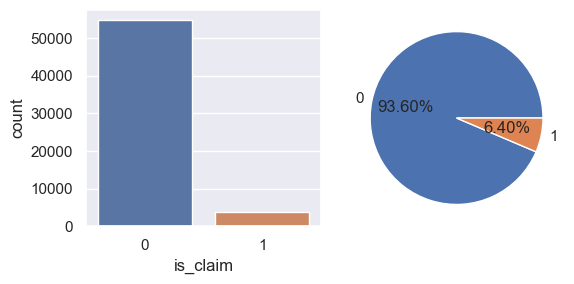

In [9]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
sns.countplot(x=data['is_claim'], label='Count of class labels')

plt.subplot(1,2,2)
plt.pie(x=data['is_claim'].value_counts(sort=False), autopct='%1.2f%%', labels=data['is_claim'].unique())

plt.tight_layout()

In [10]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns

len(num_cols) + len(obj_cols)

44

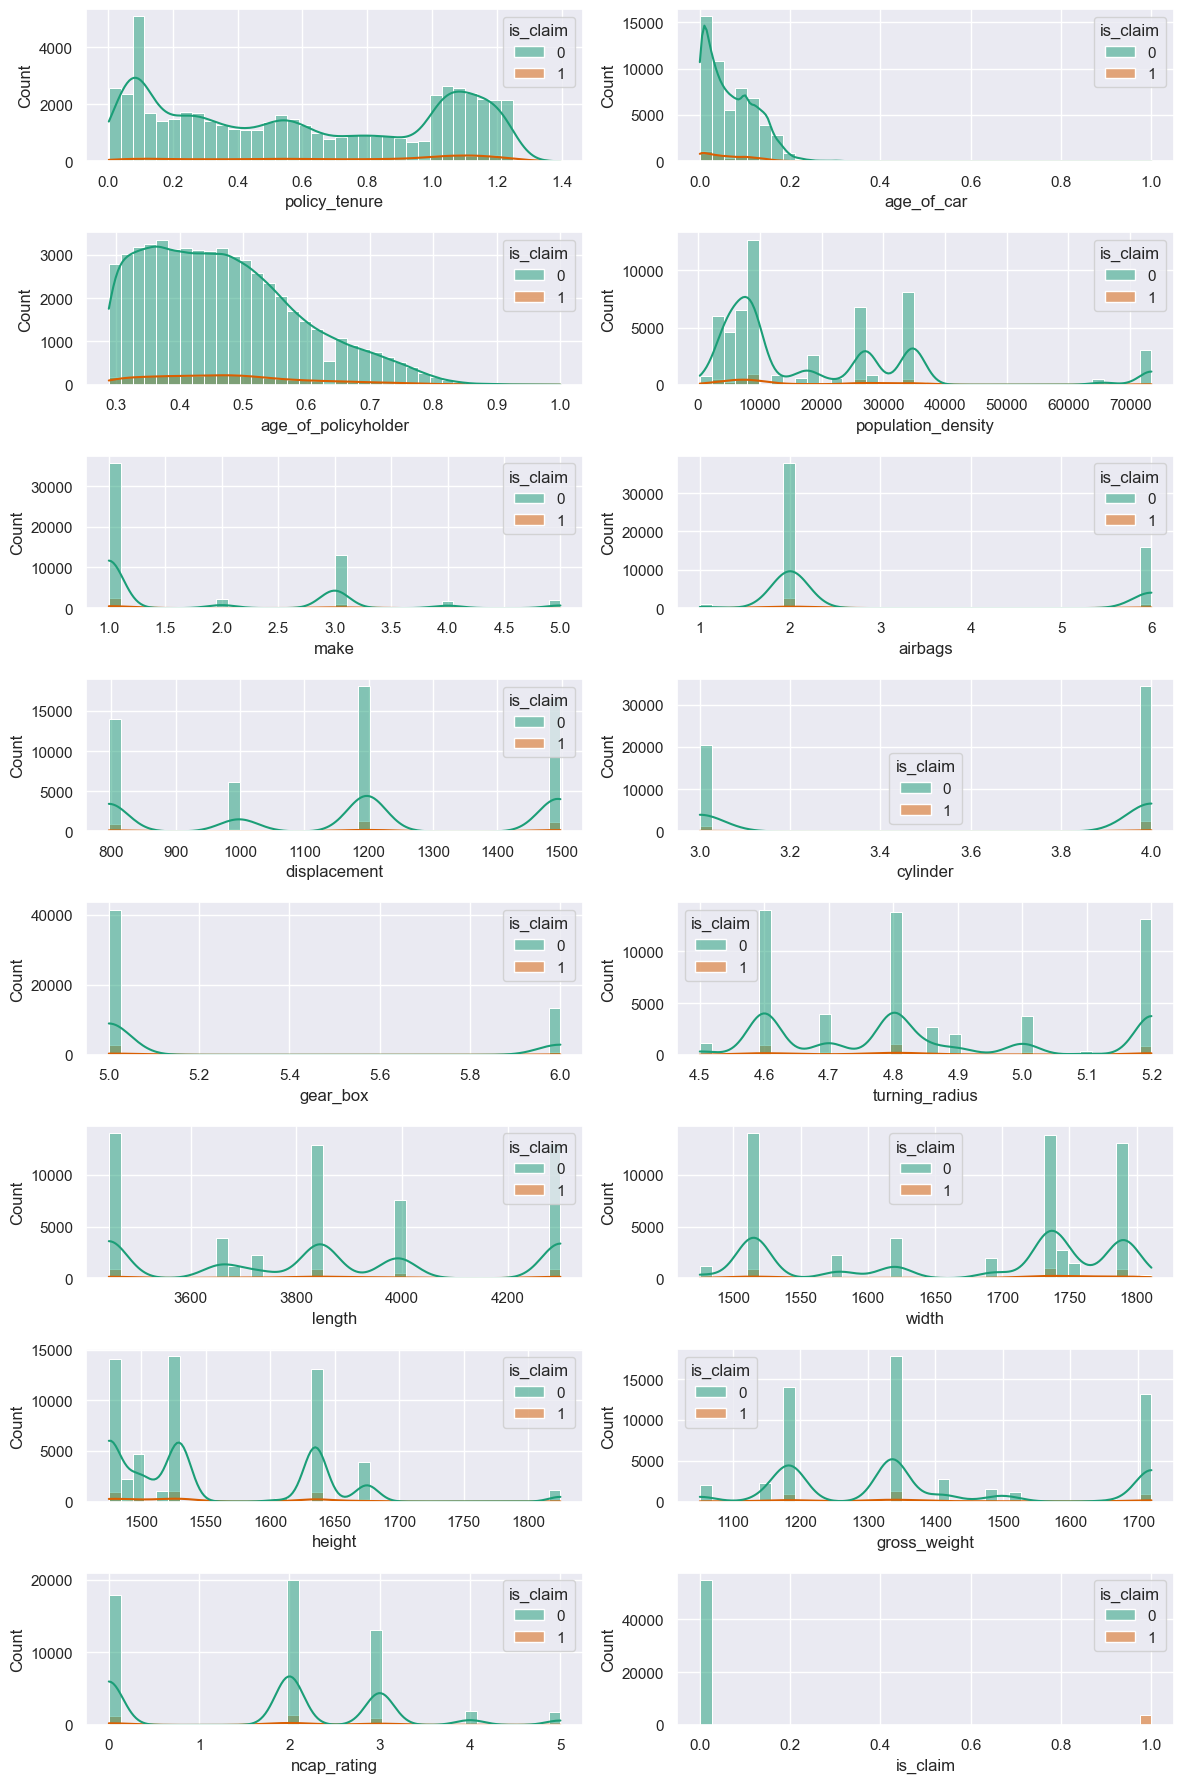

In [11]:
plt.figure(figsize=(12,18))
plot_number = 1
w_bins = math.floor(len(data)**(1/3))

for i in range(len(num_cols)):
    #print(i)
    ax = plt.subplot(8,2,plot_number)
    sns.histplot(data=data, x=num_cols[i], label=f"Distribution plot for {num_cols[i]}", hue='is_claim', palette='Dark2', kde=True, bins=w_bins)
    plot_number += 1
plt.tight_layout()

- None of numerical features shows significant signals towards class-1
- Close overlap seen in the distribution of class 0 and class 1

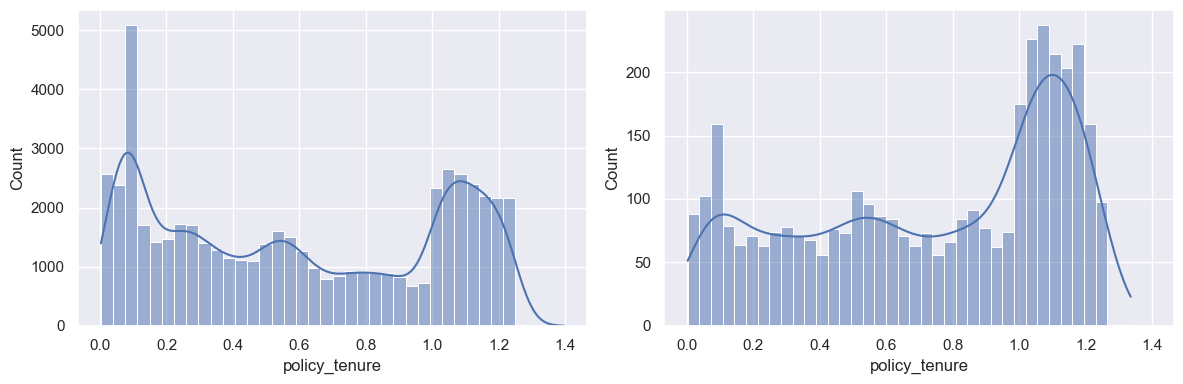

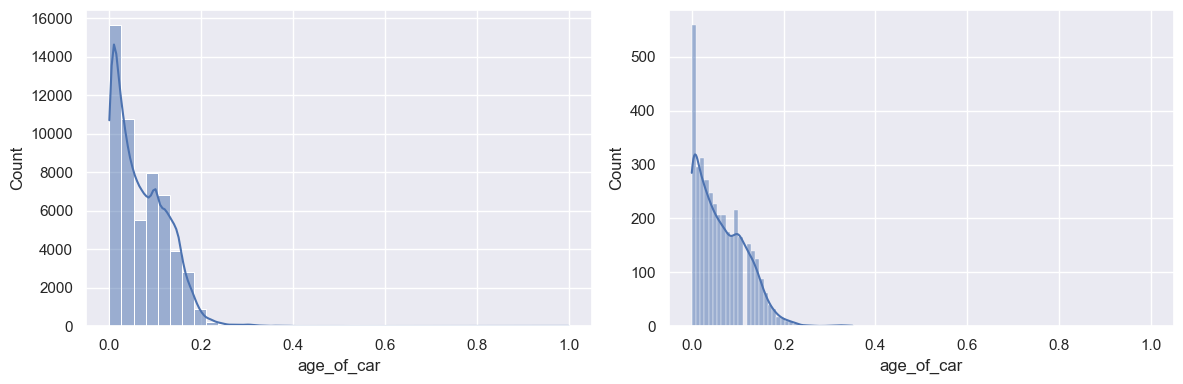

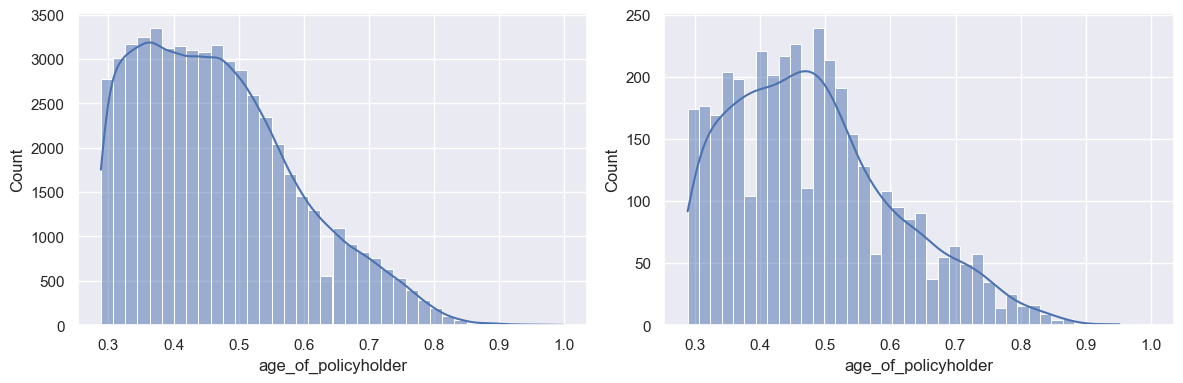

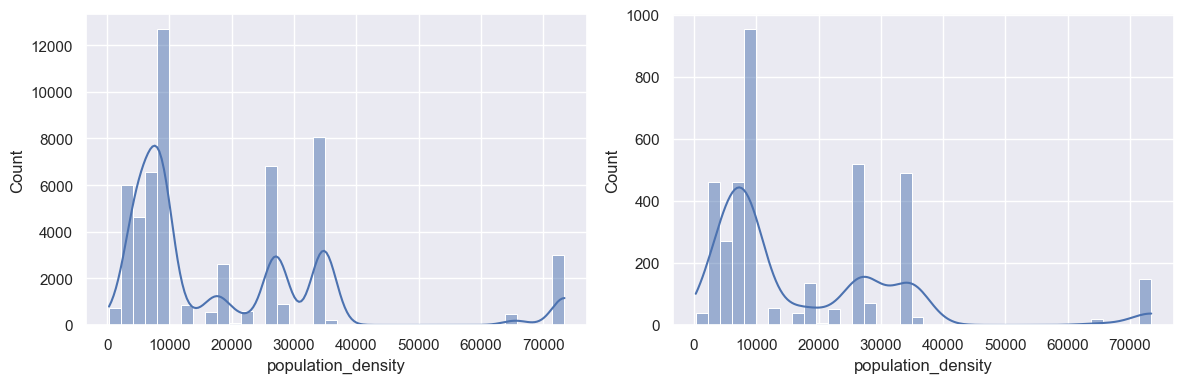

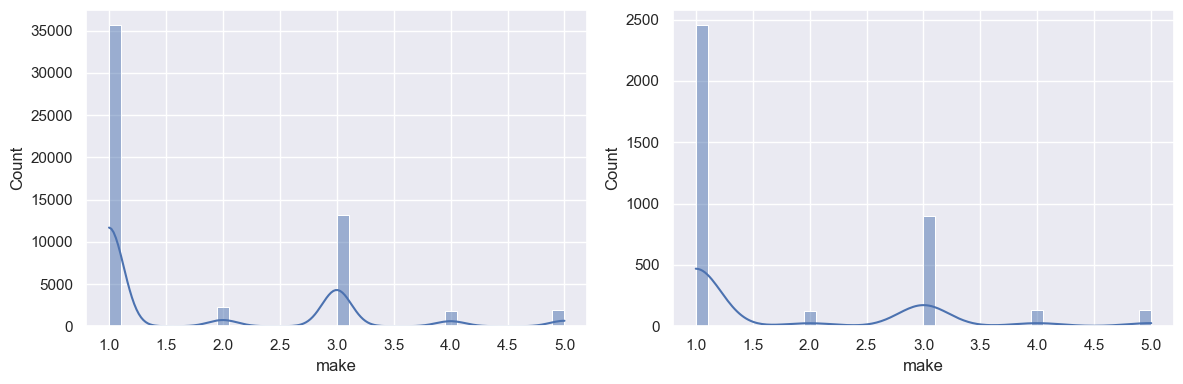

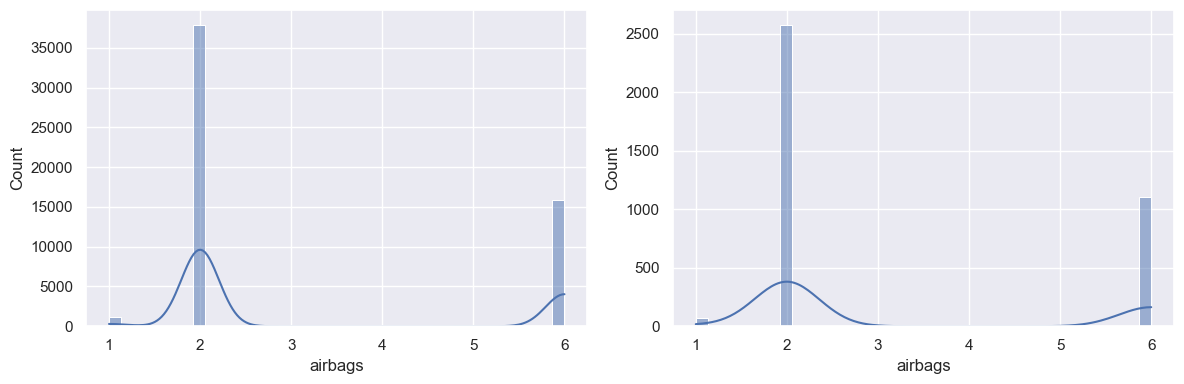

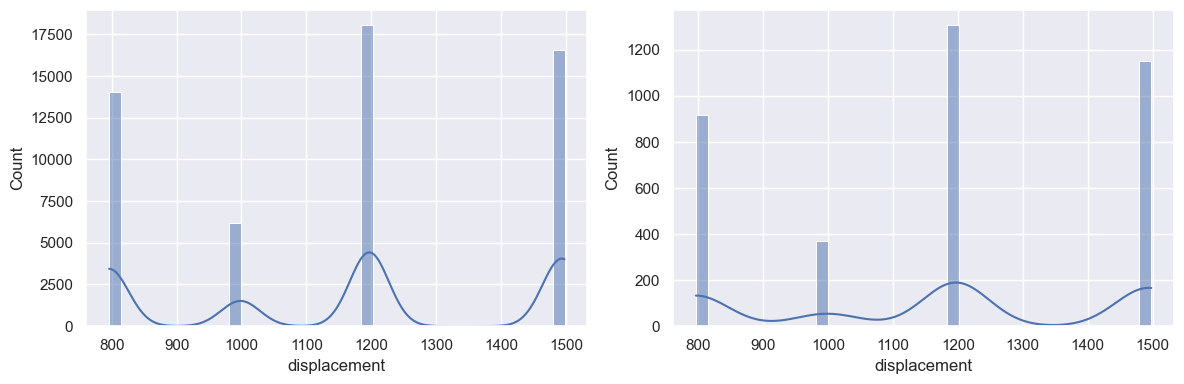

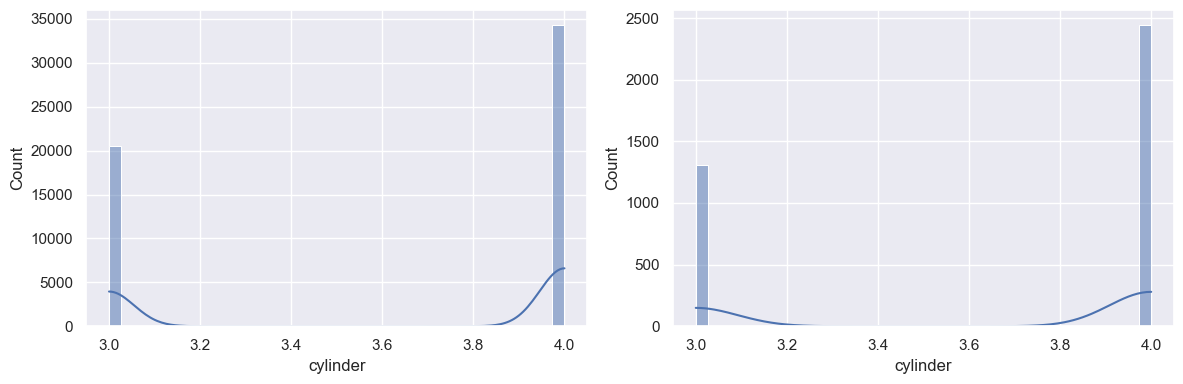

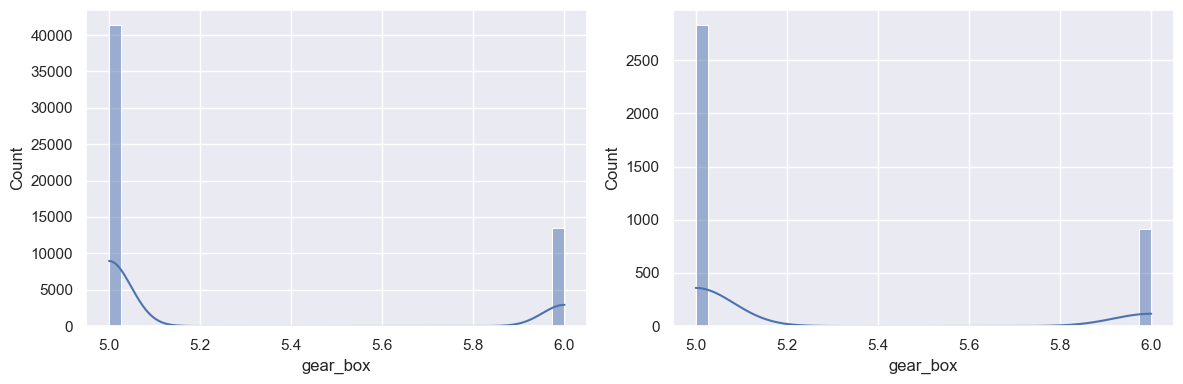

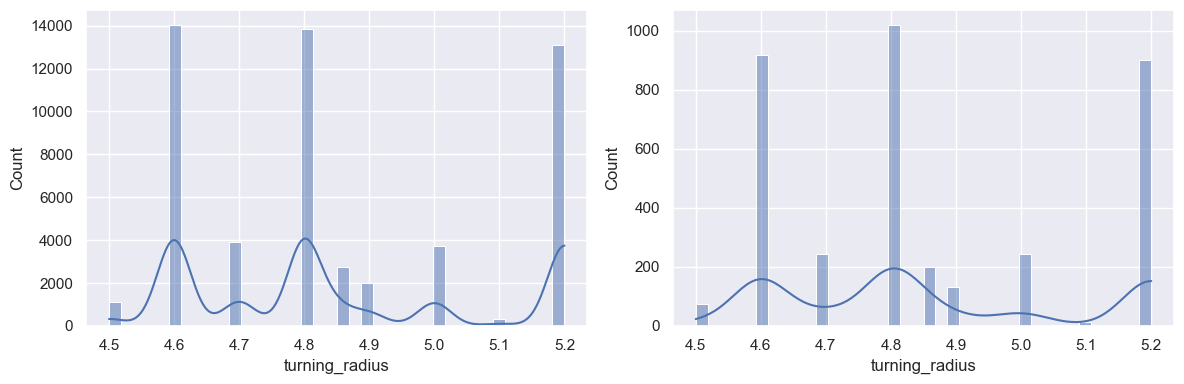

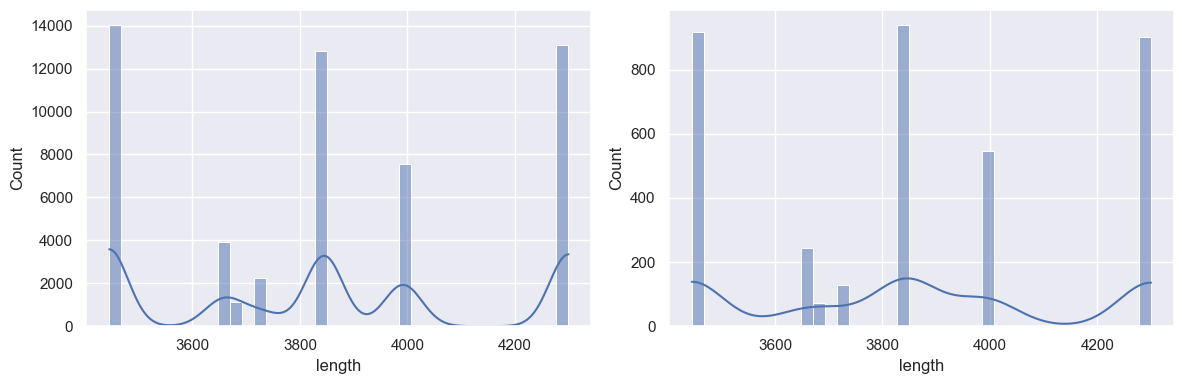

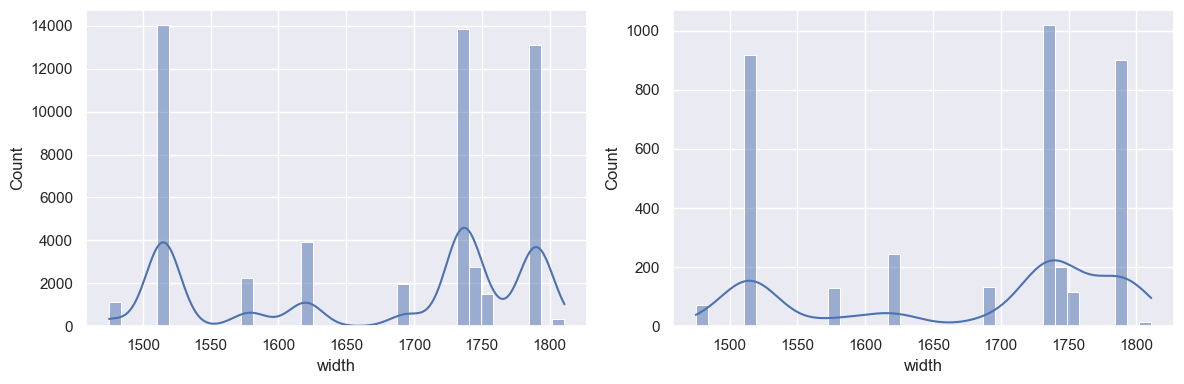

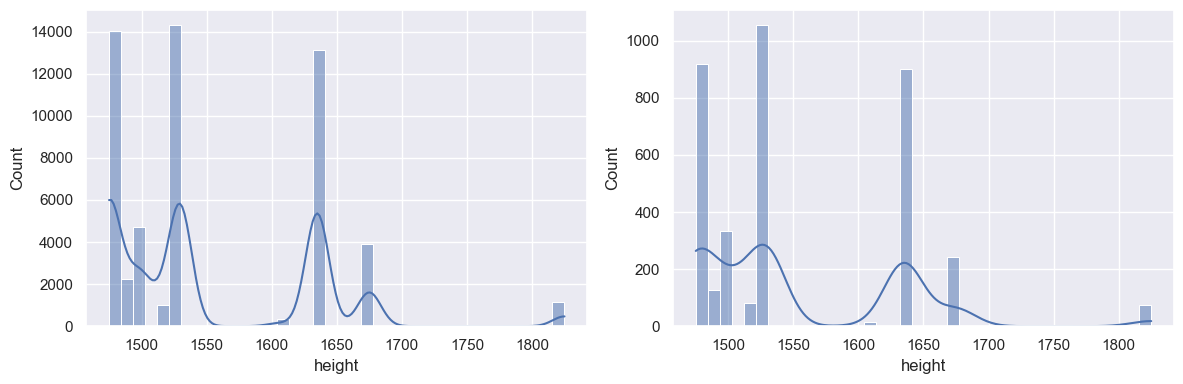

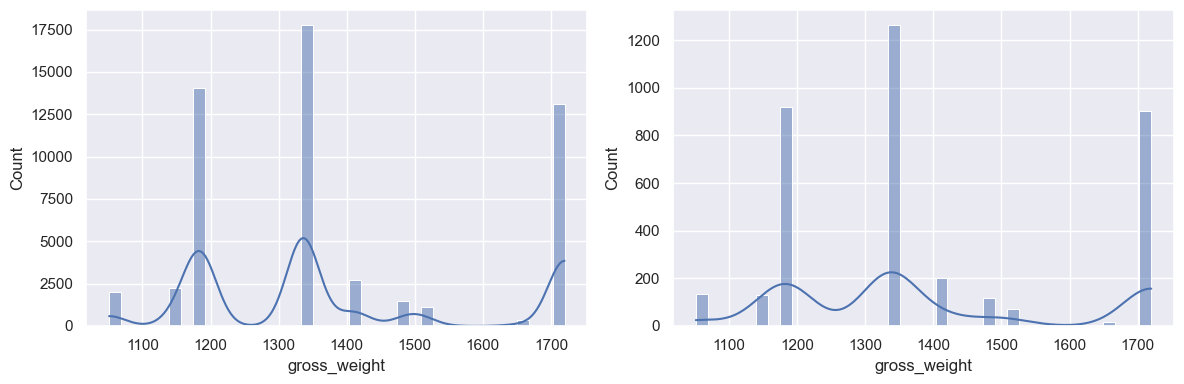

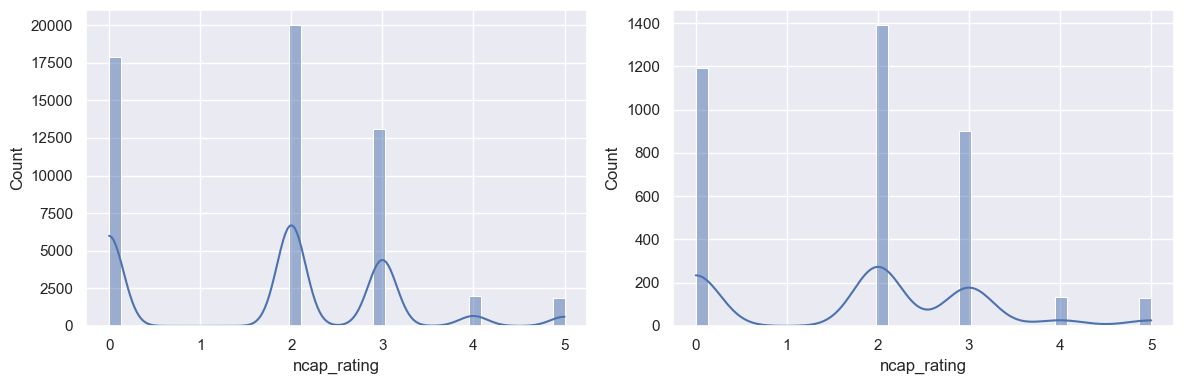

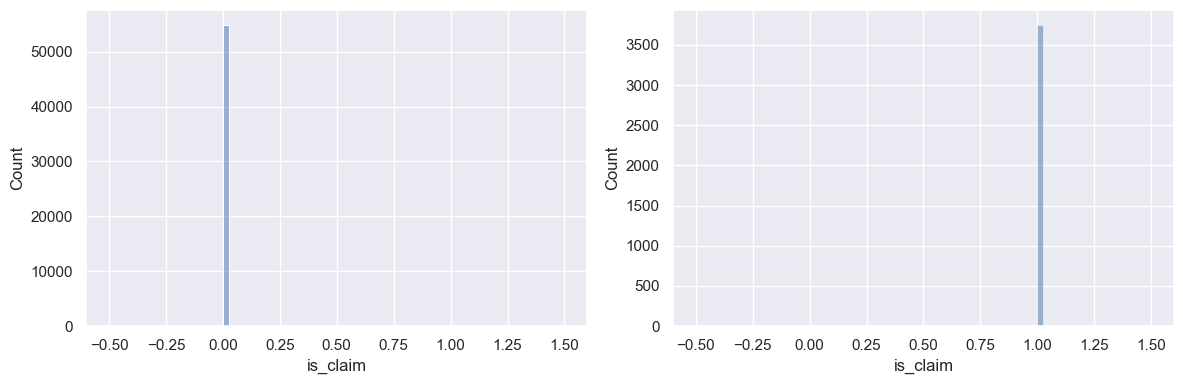

In [12]:
#plt.figure(figsize=(12,18))
plot_number = 1
w_bins = math.floor(len(data)**(1/3))

c0 = data[data['is_claim'] == 0]
c1 = data[data['is_claim'] == 1]

nrows=16
ncols=2
#fig, ax = plt.subplots(nrows, ncols, figsize=(12,18))

for i, col in enumerate(num_cols):
    #print(i)
    #ax = plt.subplot(nrows,ncols,plot_number)
    fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)
    sns.histplot(data=c0, x=col, label=f"Distribution plot for Class0-{col}", palette=sns.color_palette("pastel"), kde=True, bins=w_bins, ax = ax[0])
    
    sns.histplot(data=c1, x=col, label=f"Distribution plot for Class1-{col}", palette=sns.color_palette("deep"), kde=True, bins=w_bins, ax=ax[1])
    plt.tight_layout()


As per distribution of class-1,
- Policy tenure between 1 and 1.2 has more claims filed(distribution is more)
- No other numerical variables shows any significant difference in the distribution
  Ex: Displacement, height, width, NCAP - distribution and X-axis remains the same for both class 0 and class 1

In [13]:
obj_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [14]:
obj_non_binary = list(data[obj_cols].nunique()[data[obj_cols].nunique().values > 2].keys())
obj_non_binary.remove('policy_id')
print(obj_non_binary)

obj_binary = list(data[obj_cols].nunique()[data[obj_cols].nunique().values <= 2].keys())
print(obj_binary)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'steering_type']
['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


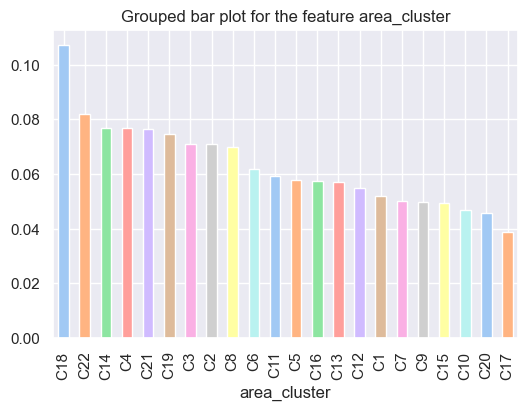

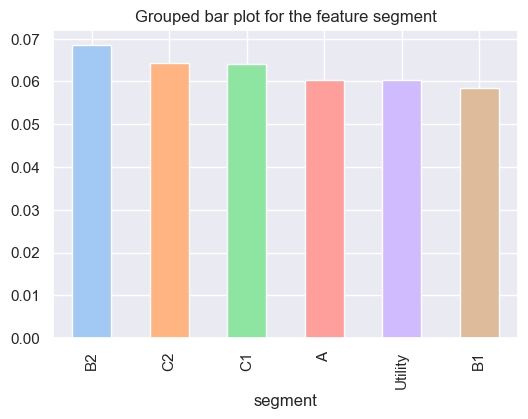

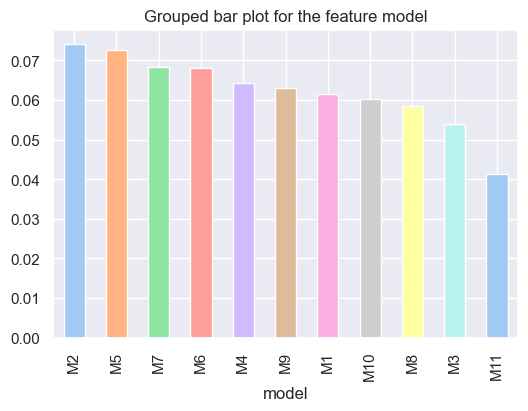

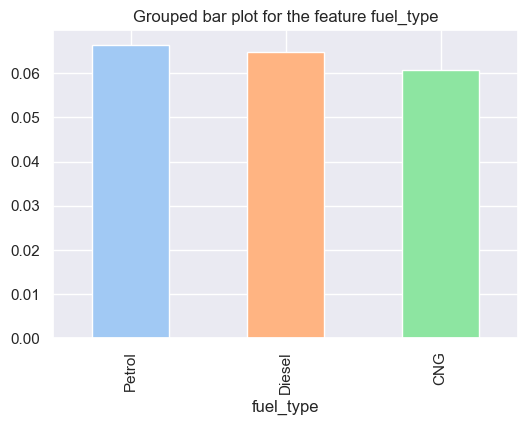

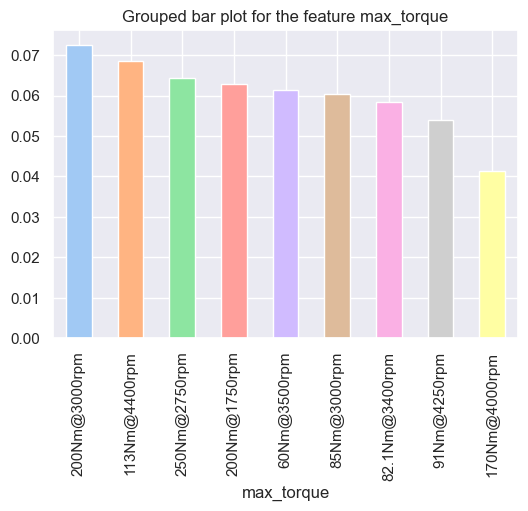

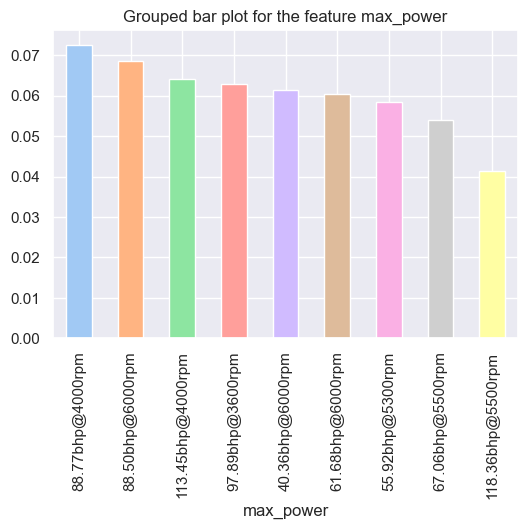

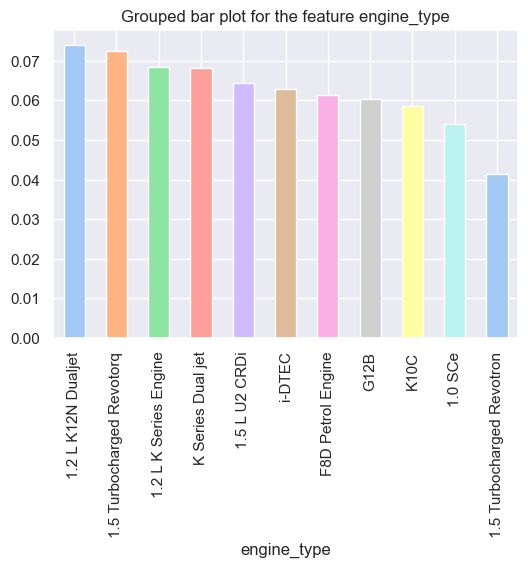

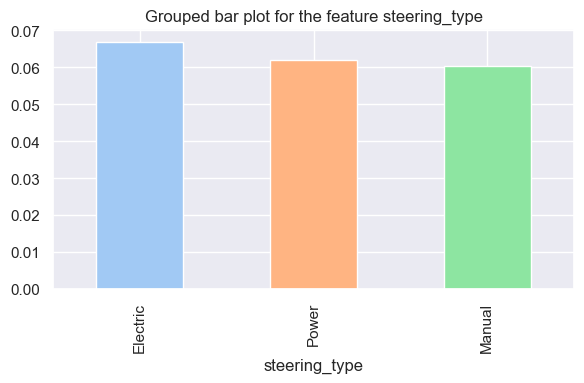

In [15]:
for non_bin_obj in obj_non_binary:
    plt.figure(figsize=(6,4))
    data.groupby(non_bin_obj)['is_claim'].mean().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette('pastel'))
    plt.title(f"Grouped bar plot for the feature {non_bin_obj}")
plt.tight_layout()

Non-Binary features,
- Feature area cluster C18 reports high number of claims whereas C17 the least number of claims
- Feature model M2 and M5 reports high number of claims whereas M11 the least number of claims
- Max torque 200Nm@300rpm has reported more number of claims but 170Nm@400rpm has less number of claims
- Max power 77bhp@400rpm has reported more number of claims but 36bhp@550rpm has less number of claims - Vehicle with less power prone to less wear and tear or less vulnerables to accidents
- Engine_type - 1.2L K12N DualJet has more number of claims - but 1.5turbocharged revotron has less number of claims - this might indirectly account to brancd of the car - Car company with 1.2L DualJet might have in general some features prone to accidents 


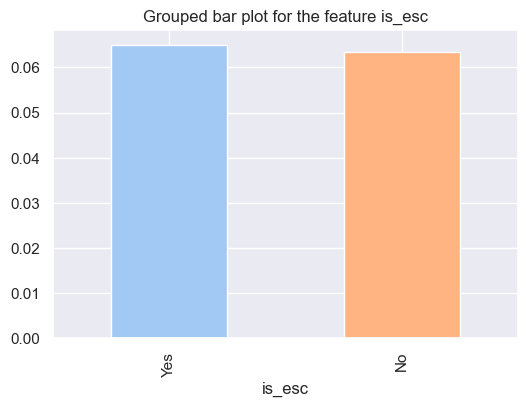

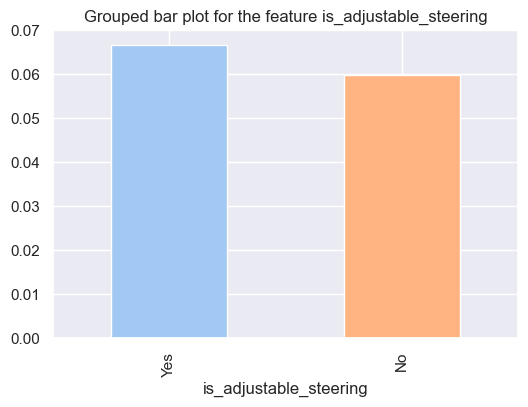

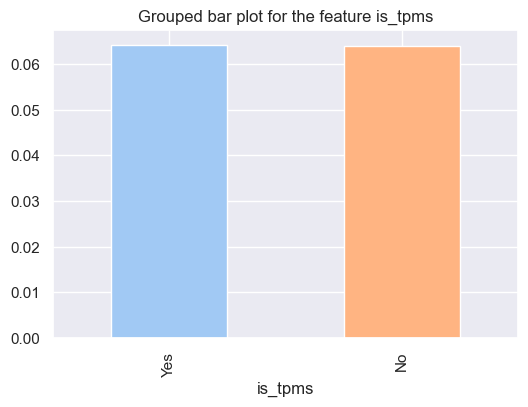

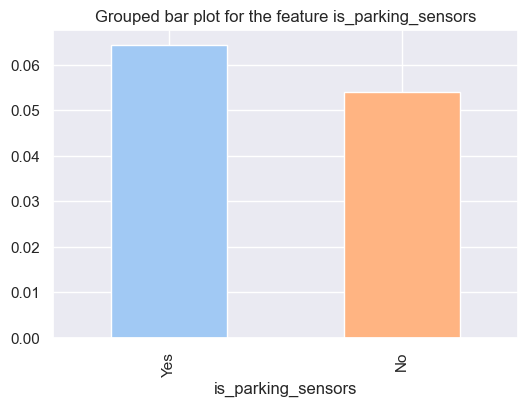

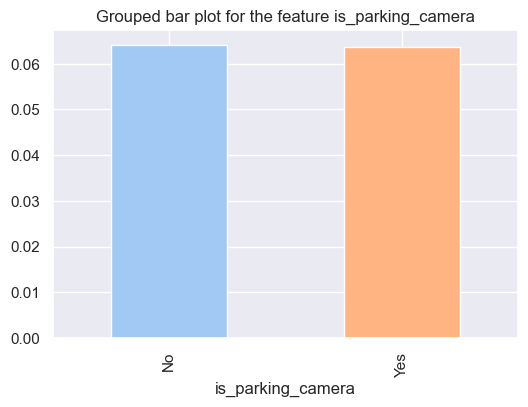

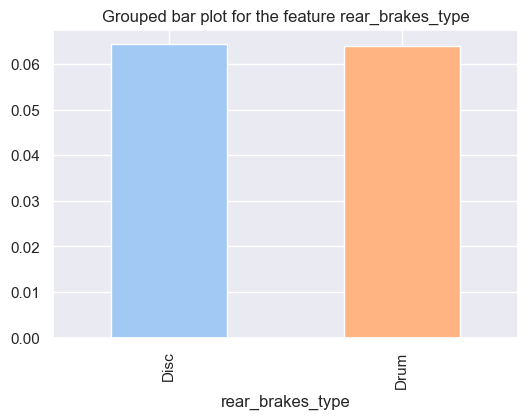

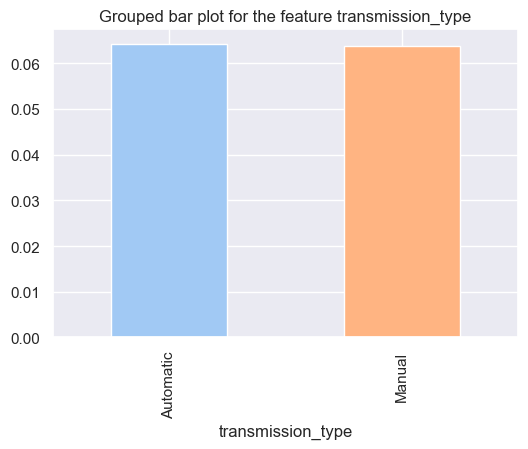

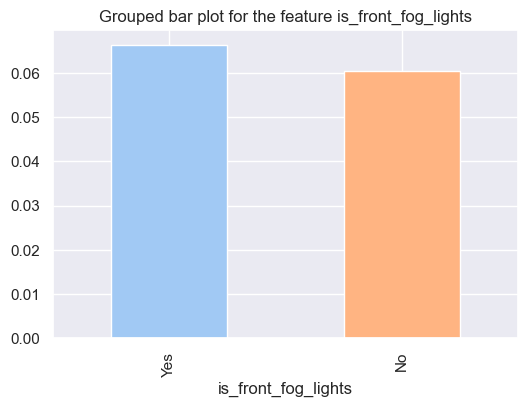

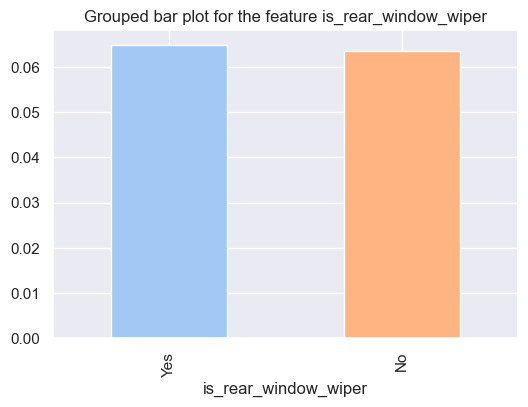

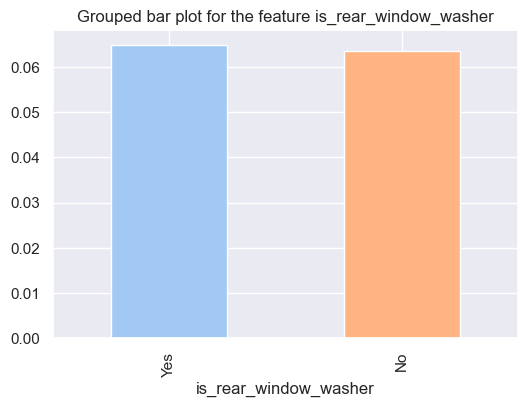

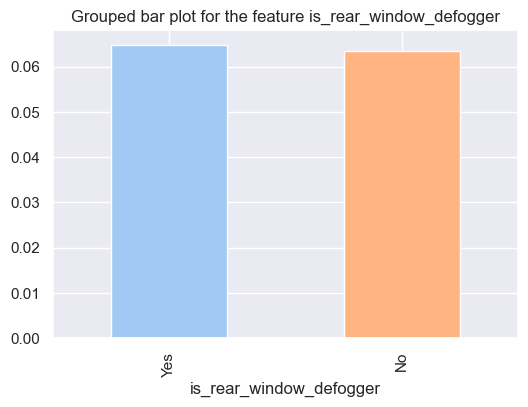

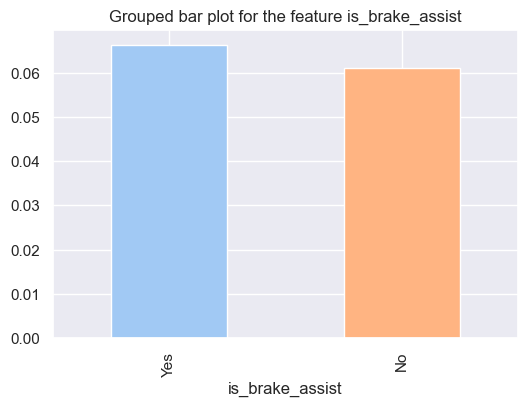

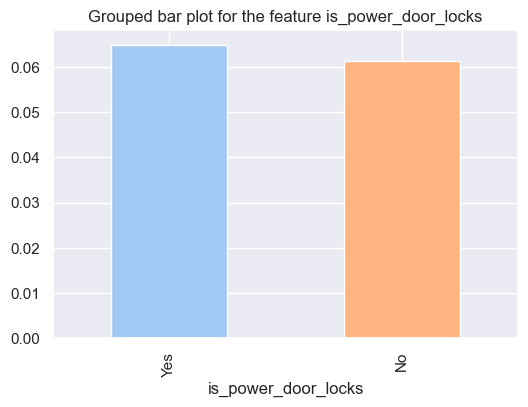

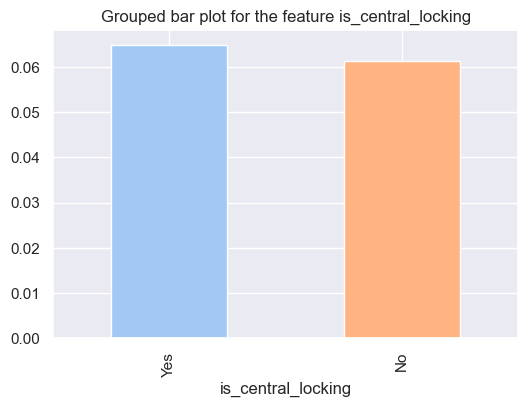

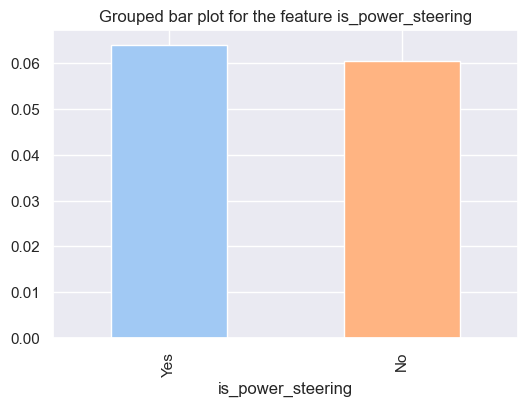

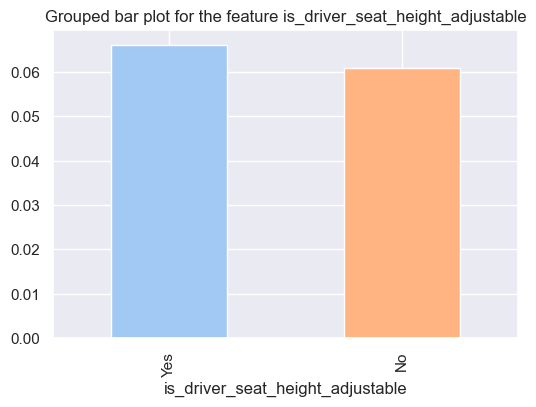

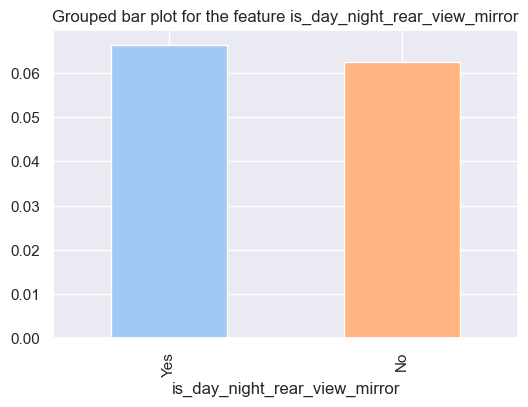

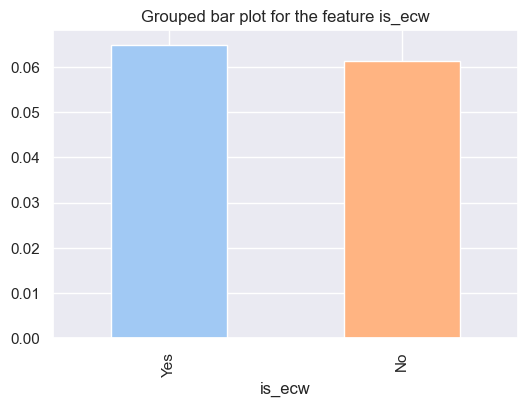

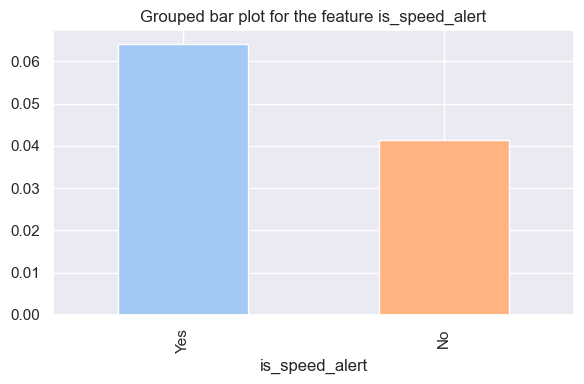

In [16]:
for bin_obj in obj_binary:
    plt.figure(figsize=(6,4))
    data.groupby(bin_obj)['is_claim'].mean().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette('pastel'))
    plt.title(f"Grouped bar plot for the feature {bin_obj}")
plt.tight_layout()

Convert the binary objects into numbers - label encoding

In [17]:
for col in obj_binary:
    print(col)
    print(data[col].unique())
    print('\n')

is_esc
['No' 'Yes']


is_adjustable_steering
['No' 'Yes']


is_tpms
['No' 'Yes']


is_parking_sensors
['Yes' 'No']


is_parking_camera
['No' 'Yes']


rear_brakes_type
['Drum' 'Disc']


transmission_type
['Manual' 'Automatic']


is_front_fog_lights
['No' 'Yes']


is_rear_window_wiper
['No' 'Yes']


is_rear_window_washer
['No' 'Yes']


is_rear_window_defogger
['No' 'Yes']


is_brake_assist
['No' 'Yes']


is_power_door_locks
['No' 'Yes']


is_central_locking
['No' 'Yes']


is_power_steering
['Yes' 'No']


is_driver_seat_height_adjustable
['No' 'Yes']


is_day_night_rear_view_mirror
['No' 'Yes']


is_ecw
['No' 'Yes']


is_speed_alert
['Yes' 'No']




In [50]:
data_v1 = data.copy(deep=True)

In [51]:
def ordinal_encoder(df, feat):
    
    for col in feat:
        print(col)
        ft_val = list(1 + np.arange(data[col].nunique()))
        ft_names = list(data[col].sort_values().unique())
        print(ft_names, ft_val)
        mapping = dict(zip(ft_names, ft_val))
        print(mapping)
        
        df[col] = df[col].map(mapping)
    
    return df

In [52]:
data_v1 = ordinal_encoder(df=data_v1, feat=obj_binary)

is_esc
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_adjustable_steering
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_tpms
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_parking_sensors
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_parking_camera
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
rear_brakes_type
['Disc', 'Drum'] [1, 2]
{'Disc': 1, 'Drum': 2}
transmission_type
['Automatic', 'Manual'] [1, 2]
{'Automatic': 1, 'Manual': 2}
is_front_fog_lights
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_rear_window_wiper
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_rear_window_washer
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_rear_window_defogger
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_brake_assist
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_power_door_locks
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_central_locking
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_power_steering
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_driver_seat_height_adjustable
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_day_night_re

In [53]:
data_v1[obj_binary].head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,1,1,1,2,1,2,2,1,1,1,1,1,1,1,2,1,1,1,2
1,1,1,1,2,1,2,2,1,1,1,1,1,1,1,2,1,1,1,2
2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,2,1,1,1,2
3,2,2,1,2,2,2,1,2,1,1,2,2,2,2,2,2,2,2,2
4,1,1,1,1,2,2,1,1,1,1,1,1,2,2,2,1,2,2,2


Handle the non binary features

In [54]:
data[obj_non_binary].dtypes

area_cluster     object
segment          object
model            object
fuel_type        object
max_torque       object
max_power        object
engine_type      object
steering_type    object
dtype: object

In [55]:
data[obj_non_binary].head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,steering_type
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Power
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Power
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Power
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Electric
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Electric


In [56]:
data[obj_non_binary].nunique()

area_cluster     22
segment           6
model            11
fuel_type         3
max_torque        9
max_power         9
engine_type      11
steering_type     3
dtype: int64

In [57]:
def ordinal_encoder1(df, feat):
    
    for col in feat:
        print(col)
        ft_names  = data.groupby(col)['is_claim'].mean().sort_values().keys()
        ft_values = list(1 + np.arange(data[col].nunique()))
        print(ft_names, ft_values)
        
        dict(zip(ft_names, ft_values))
        mapping = dict(zip(ft_names, ft_values))
        
        print(mapping)
        
        df[col] = df[col].map(mapping)
    
    return df

In [58]:
data_v1 = ordinal_encoder1(df=data_v1, feat=obj_non_binary)
data_v1[obj_non_binary].head()

area_cluster
Index(['C17', 'C20', 'C10', 'C15', 'C9', 'C7', 'C1', 'C12', 'C13', 'C16', 'C5',
       'C11', 'C6', 'C8', 'C2', 'C3', 'C19', 'C21', 'C4', 'C14', 'C22', 'C18'],
      dtype='object', name='area_cluster') [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
{'C17': 1, 'C20': 2, 'C10': 3, 'C15': 4, 'C9': 5, 'C7': 6, 'C1': 7, 'C12': 8, 'C13': 9, 'C16': 10, 'C5': 11, 'C11': 12, 'C6': 13, 'C8': 14, 'C2': 15, 'C3': 16, 'C19': 17, 'C21': 18, 'C4': 19, 'C14': 20, 'C22': 21, 'C18': 22}
segment
Index(['B1', 'Utility', 'A', 'C1', 'C2', 'B2'], dtype='object', name='segment') [1, 2, 3, 4, 5, 6]
{'B1': 1, 'Utility': 2, 'A': 3, 'C1': 4, 'C2': 5, 'B2': 6}
model
Index(['M11', 'M3', 'M8', 'M10', 'M1', 'M9', 'M4', 'M6', 'M7', 'M5', 'M2'], dtype='object', name='model') [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{'M11': 1, 'M3': 2, 'M8': 3, 'M10': 4, 'M1': 5, 'M9': 6, 'M4': 7, 'M6': 8, 'M7': 9, 'M5': 10, 'M2': 11}
fuel_type
Index(['CNG', 'Diesel', 'Petrol'], dtype='object', 

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,steering_type
0,7,3,5,1,5,5,5,2
1,15,3,5,1,5,5,5,2
2,16,3,5,1,5,5,5,2
3,19,4,11,3,8,8,11,3
4,11,3,2,3,2,2,2,3


* ENcoding of all variables are completed

In [61]:
data_v1.iloc[0]

policy_id                            ID00001
policy_tenure                       0.515874
age_of_car                              0.05
age_of_policyholder                 0.644231
area_cluster                               7
population_density                      4990
make                                       1
segment                                    3
model                                      5
fuel_type                                  1
max_torque                                 5
max_power                                  5
engine_type                                5
airbags                                    2
is_esc                                     1
is_adjustable_steering                     1
is_tpms                                    1
is_parking_sensors                         2
is_parking_camera                          1
rear_brakes_type                           2
displacement                             796
cylinder                                   3
transmissi

In [71]:
var_details = pd.DataFrame(data_v1.var('index'), columns=['var']).reset_index()
var_details[var_details['var'] < 1].sort_values(by='var', ascending=True)

,index,var
1,age_of_car,0.003217
40,is_speed_alert,0.006157
2,age_of_policyholder,0.015101
36,is_power_steering,0.020209
16,is_parking_sensors,0.038861
24,turning_radius,0.052012
42,is_claim,0.059877
0,policy_tenure,0.171526
18,rear_brakes_type,0.182011
15,is_tpms,0.182011


In [72]:
var_details[var_details['var'] >= 1].sort_values(by='var', ascending=True)

,index,var
5,make,1.292741e+00
41,ncap_rating,1.930923e+00
6,segment,2.410221e+00
12,airbags,3.358574e+00
9,max_torque,3.430370e+00
10,max_power,3.430370e+00
7,model,4.181778e+00
11,engine_type,4.181778e+00
3,area_cluster,2.132504e+01
27,height,6.339706e+03


26 indepdendent features have variance less than 1

Correlation plot

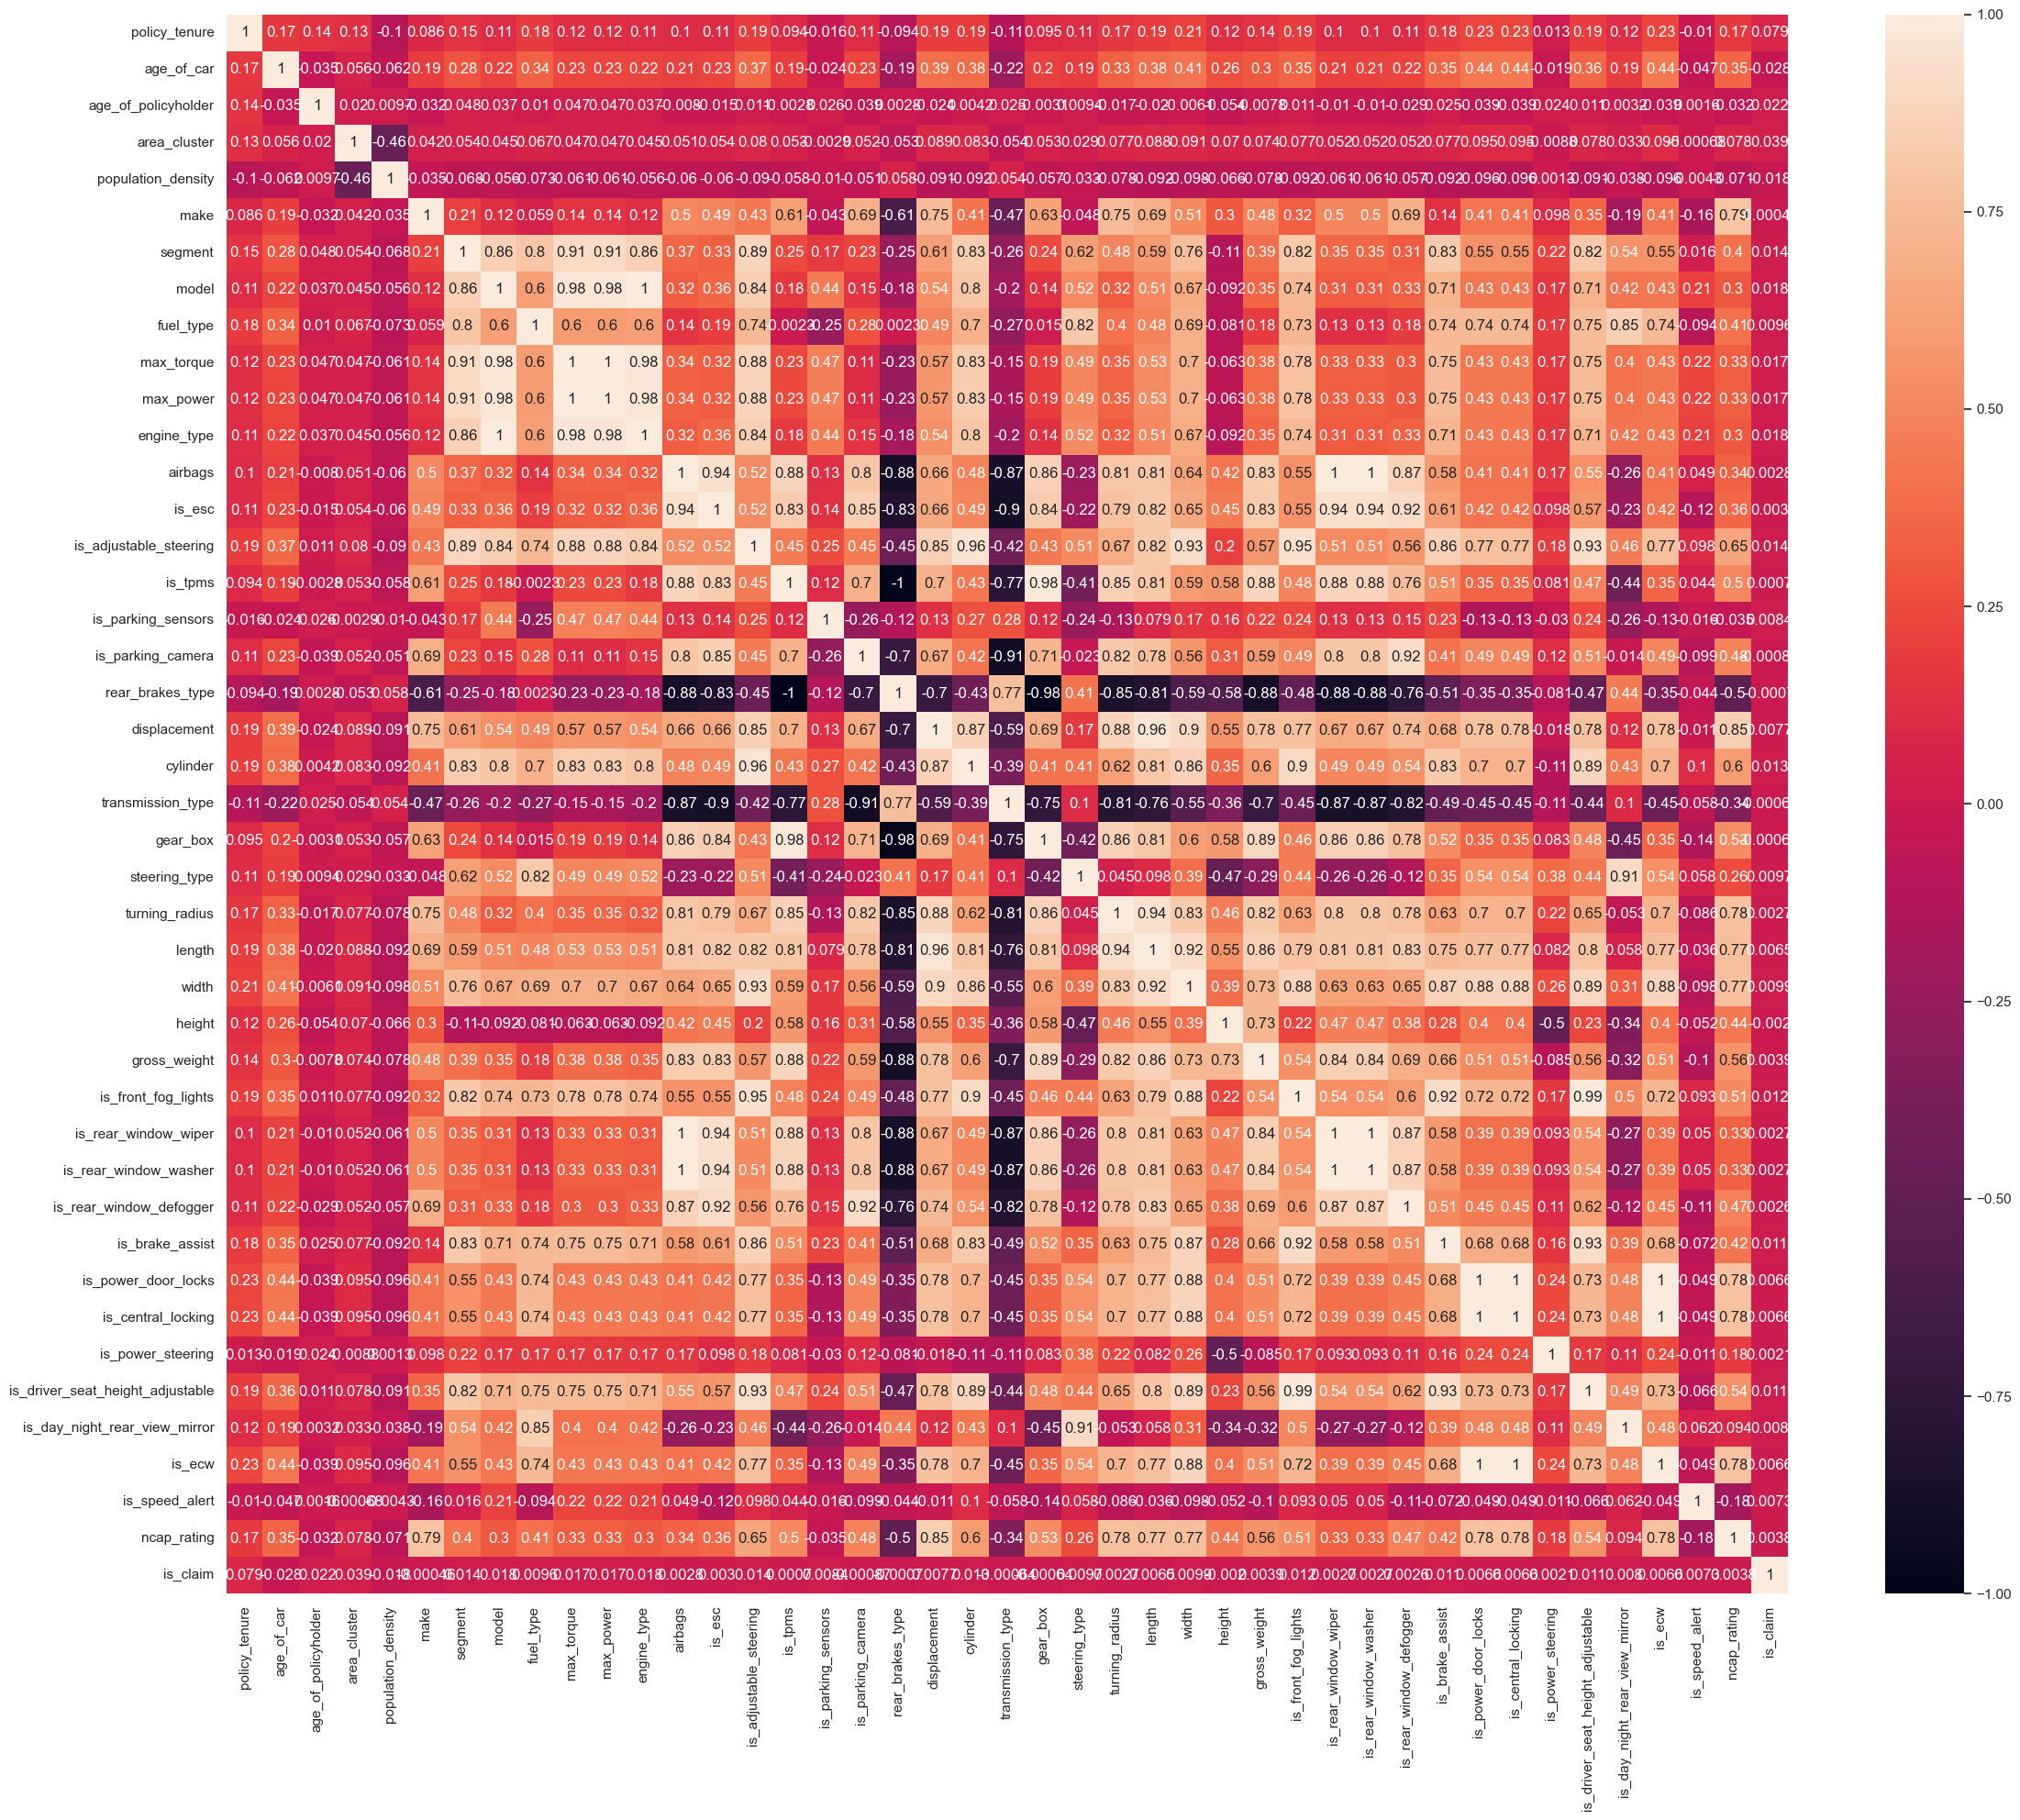

In [75]:
plt.figure(figsize=(24,20))
sns.heatmap(data_v1.corr(), vmin=-1, vmax=+1, annot=True)
plt.tight_layout()

Since the data is already normalized, not getting a clear picture from correlation plot - many correlated features are reported as per above plot

Indepdendent & Depedent features

In [66]:
X = data_v1.drop(['policy_id', 'is_claim'], axis=1)
Y = data_v1['is_claim']

print(X.shape, Y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1702)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print('\n')
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(58592, 42) (58592,)
(41014, 42) (41014,)
(17578, 42) (17578,)


0    0.936656
1    0.063344
Name: is_claim, dtype: float64
0    0.934577
1    0.065423
Name: is_claim, dtype: float64


### Modelling

In [76]:
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier


def fit_model(X_train, y_train, X_test, y_test, **kwargs):
    
    scores = {}
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        
        print(f"XGB: Train score {accuracy_score(y_train, xgb_model.predict(X_train))}")
        print(f"XGB: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"XGB: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        
        print_metrics(y_test, y_pred)
        
        print('\n')
        
        scores['xgb'] = accuracy_score(y_test, y_pred)
        
    if 'gbm' in kwargs.keys() and kwargs['gbm']:
        gbm_model = GradientBoostingClassifier()
        gbm_model.fit(X_train, y_train)
        y_pred = gbm_model.predict(X_test)
        
        print(f"GBM: Train score {accuracy_score(y_train, gbm_model.predict(X_train))}")
        print(f"GBM: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"GBM: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['GBM'] = accuracy_score(y_test, y_pred)
        
    if 'logistic' in kwargs.keys() and kwargs['logistic']:
        log_model = LogisticRegression()
        log_model.fit(X_train, y_train)
        y_pred = log_model.predict(X_test)
        
        print(f"Log: Train score {accuracy_score(y_train, log_model.predict(X_train))}")
        print(f"Log: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"Log: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['logistic'] = accuracy_score(y_test, y_pred)    
        
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf_model = RandomForestClassifier()
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        
        print(f"RF: Train score {accuracy_score(y_train, rf_model.predict(X_train))}")
        print(f"RF: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"RF: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['rf'] = accuracy_score(y_test, y_pred)      
        
    if 'etc' in kwargs.keys() and kwargs['etc']:
        etc_model = RandomForestClassifier()
        etc_model.fit(X_train, y_train)
        y_pred = etc_model.predict(X_test)
        
        print(f"ETC: Train score {accuracy_score(y_train, etc_model.predict(X_train))}")
        print(f"ETC: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"ETC: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['etc'] = accuracy_score(y_test, y_pred)              
        
    return scores  


def print_metrics(y_test, y_pred):
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        tp = conf_matrix[1,1]
        fn = conf_matrix[1,0]
        fp = conf_matrix[0,1]
        tn = conf_matrix[0,0]
        
        Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
        Precision =  (tp/(tp+fp))
        Recall    =  (tp/(tp+fn))
        F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

        show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]], columns=['Acc', 'Prec', 'Reca', 'F1'])
        show_metrics = show_metrics.T
        
        print(show_metrics)
        

In [77]:
fit_model(X_train, y_train, X_test, y_test, xgb=True, gbm=True, logistic=True, rf=True, etc=True)

[17:35:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: Train score 0.9383381284439459
XGB: Test  score 0.9340653089088633
XGB: F1    score 0.9027164099629266
Precision 0.0
Recall 0.0
[[16419     9]
 [ 1150     0]]
[[16419     9]
 [ 1150     0]]
             0
Acc   0.934065
Prec  0.000000
Reca  0.000000
F1         NaN


GBM: Train score 0.936826449505047
GBM: Test  score 0.9344066446694732
GBM: F1    score 0.9028869428362265
Precision 0.0
Recall 0.0
[[16425     3]
 [ 1150     0]]


[[16425     3]
 [ 1150     0]]
             0
Acc   0.934407
Prec  0.000000
Reca  0.000000
F1         NaN
Log: Train score 0.9366557760764617
Log: Test  score 0.9345773125497782
Log: F1    score 0.9029721867063316
Precision 0.0
Recall 0

{'xgb': 0.9340653089088633,
 'GBM': 0.9344066446694732,
 'logistic': 0.9345773125497782,
 'rf': 0.9299123904881101,
 'etc': 0.9307088405961998}

Oversample the records

In [78]:
counter = Counter(y_train)

for k, v in counter.items():
    print(f"{k} : {v/len(y_train)}")

0 : 0.9366557760764617
1 : 0.0633442239235383


In [79]:
counter = Counter(y_train)

for k, v in counter.items():
    print(f"{k} : {v/len(y_train)}")

print('\n')    
print(X_train.shape, y_train.shape)    

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k, v in counter.items():
    print(f"{k} : {v/len(y_train)}")
print(X_train.shape, y_train.shape)    

0 : 0.9366557760764617
1 : 0.0633442239235383


(41014, 42) (41014,)
0 : 0.5
1 : 0.5
(76832, 42) (76832,)


In [80]:
fit_model(X_train, y_train, X_test, y_test, xgb=True, gbm=True, logistic=True, rf=True, etc=True)

[17:39:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: Train score 0.9639863598500624
XGB: Test  score 0.932586187279554
XGB: F1    score 0.9024077693918534
Precision 0.09302325581395349
Recall 0.0034782608695652175
[[16389    39]
 [ 1146     4]]
[[16389    39]
 [ 1146     4]]
             0
Acc   0.932586
Prec  0.093023
Reca  0.003478
F1    0.006706


GBM: Train score 0.9026447313619326
GBM: Test  score 0.8915121174195016
GBM: F1    score 0.8889441505188348
Precision 0.13570741097208855
Recall 0.12260869565217392
[[15530   898]
 [ 1009   141]]


[[15530   898]
 [ 1009   141]]
             0
Acc   0.891512
Prec  0.135707
Reca  0.122609
F1    0.128826
Log: Train score 0.5352977925864223
Log: Test  score 0.459210376

{'xgb': 0.932586187279554,
 'GBM': 0.8915121174195016,
 'logistic': 0.45921037660712255,
 'rf': 0.8611901240186597,
 'etc': 0.8601092274433951}

Fine tune the GBM model

In [81]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

print(f"GBM: Train score {accuracy_score(y_train, gbm_model.predict(X_train))}")
print(f"GBM: Test  score {accuracy_score(y_test, y_pred)}")
print(f"GBM: F1    score {f1_score(y_test, y_pred, average='weighted')}")
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print('\n')

print_metrics(y_test, y_pred)

GBM: Train score 0.9026447313619326
GBM: Test  score 0.8915121174195016
GBM: F1    score 0.8889441505188348
Precision 0.13570741097208855
Recall 0.12260869565217392
[[15530   898]
 [ 1009   141]]


[[15530   898]
 [ 1009   141]]
             0
Acc   0.891512
Prec  0.135707
Reca  0.122609
F1    0.128826


In [84]:
test = pd.read_csv('test_zo1G9sv.csv')
print("Number of data points: ", test.shape[0])
print("Number of features   : ", test.shape[1])

test_v1 = ordinal_encoder(df=test, feat=obj_binary)
test_v1 = ordinal_encoder1(df=test_v1, feat=obj_non_binary)
test_v1.head()

Number of data points:  39063
Number of features   :  43
is_esc
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_adjustable_steering
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_tpms
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_parking_sensors
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_parking_camera
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
rear_brakes_type
['Disc', 'Drum'] [1, 2]
{'Disc': 1, 'Drum': 2}
transmission_type
['Automatic', 'Manual'] [1, 2]
{'Automatic': 1, 'Manual': 2}
is_front_fog_lights
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_rear_window_wiper
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_rear_window_washer
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_rear_window_defogger
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_brake_assist
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_power_door_locks
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_central_locking
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_power_steering
['No', 'Yes'] [1, 2]
{'No': 1, 'Yes': 2}
is_driver_seat_height_adjustable

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,16,4076,1,3,5,1,...,1,1,1,1,2,1,1,1,2,0
1,ID58594,0.307241,0.13,0.442308,14,8794,1,6,8,3,...,1,2,2,2,2,2,2,2,2,2
2,ID58595,0.327924,0.12,0.451923,14,8794,2,3,2,3,...,1,1,2,2,2,1,2,2,2,2
3,ID58596,0.782654,0.01,0.461538,11,34738,1,3,5,1,...,1,1,1,1,2,1,1,1,2,0
4,ID58597,1.233404,0.02,0.634615,11,34738,1,3,5,1,...,1,1,1,1,2,1,1,1,2,0


In [86]:
def infer_test_data(model, test_df):
    y_hat = model.predict(test_df)
    print(y_hat)
    
    submission = pd.read_csv('sample_submission_KvRh9Sx.csv')
    submission['is_claim'] = y_hat
    print(submission.head())
    
    submission.to_csv('submission.csv', index=False)

In [88]:
infer_test_data(gbm_model, test_v1.drop('policy_id', axis=1))

[1 0 0 ... 0 0 0]
  policy_id  is_claim
0   ID58593         1
1   ID58594         0
2   ID58595         0
3   ID58596         0
4   ID58597         0


GBM Tune-1

In [89]:
#Choose all predictors except target & IDcols
predictors = [col for col in X_train.columns] #if x not in [target, IDcol]]

#define 20 to 80 trees
param_test1 = {'n_estimators':range(100,150,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000,min_samples_leaf=50,max_depth=20,max_features='sqrt',subsample=0.8,random_state=1702), 
param_grid = param_test1, scoring='f1',n_jobs=4, cv=5)

gsearch1.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=20,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=1000,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(100, 150, 10)},
             scoring='f1')

In [90]:
gsearch1.best_score_, gsearch1.best_params_, gsearch1.best_score_

(0.904412615005735, {'n_estimators': 140}, 0.904412615005735)

Step 2- Tune tree-specific parameters
Now, lets move onto tuning the tree parameters. We will do this in 2 stages:

Tune max_depth and num_samples_split
Tune min_samples_leaf
Tune max_features

In [91]:
#Grid seach on subsample and max_features

param_test2 = {'max_depth':range(10,20,2), 'min_samples_split':range(400,1600,200)}


gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,
                                                max_features='sqrt', subsample=0.8, random_state=1702), 
                       param_grid = param_test2, scoring='f1',n_jobs=4, cv=5)

gsearch2.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(10, 20, 2),
                         'min_samples_split': range(400, 1600, 200)},
             scoring='f1')

In [92]:
gsearch2.best_score_, gsearch2.best_params_, gsearch2.best_score_

(0.9315362912167835,
 {'max_depth': 18, 'min_samples_split': 400},
 0.9315362912167835)

In [110]:
#Grid seach on min_samples_leaf

param_test3 = {'min_samples_leaf':range(30,90,10),
               'min_samples_split':range(2,10,2)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=140,max_depth=18,
                                                    max_features='sqrt', min_samples_split=400,
                                                    subsample=0.8, random_state=1702), 
                                                    param_grid = param_test3, scoring='f1',n_jobs=4, cv=5)
gsearch3.fit(X_train[predictors],y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=18,
                                                  max_features='sqrt',
                                                  min_samples_split=400,
                                                  n_estimators=140,
                                                  random_state=1702,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 90, 10),
                         'min_samples_split': range(2, 10, 2)},
             scoring='f1')

In [111]:
gsearch3.best_score_, gsearch3.best_params_, gsearch3.best_score_

(0.9341797134131916,
 {'min_samples_leaf': 30, 'min_samples_split': 2},
 0.9341797134131916)

In [112]:
gsearch3.best_estimator_

GradientBoostingClassifier(max_depth=18, max_features='sqrt',
                           min_samples_leaf=30, n_estimators=140,
                           random_state=1702, subsample=0.8)

In [113]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printfeatureimportance=True, cv_folds=5):
    
    #Fit algorithm on the data
    alg.fit(dtrain[predictors], y_train)
    
    #predict the training set
    dtrain_predictions=alg.predict(dtrain[predictors])
    dtrain_predprob=alg.predict_proba(dtrain[predictors])[:,1]
    
    #perform cross validation
    if performCV:
        cv_score=cross_val_score(alg, dtrain[predictors], y_train, cv=cv_folds, scoring='f1')
        
    #print model report
    print('\nModel Report')
    print("Train f1 score : %.4g" %f1_score(y_train, dtrain_predictions))
    print("Test f1 score : %.4g" %f1_score(y_test, alg.predict(dtest[predictors])))
    
    if performCV:
        print("CV Score: Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
        
    #print feature importance
    if printfeatureimportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
    return alg


Model Report
Train f1 score : 0.9682
Test f1 score : 0.09004
CV Score: Mean - 0.9341797 | Std - 0.05549501 | Min - 0.8232089 | Max - 0.9636201


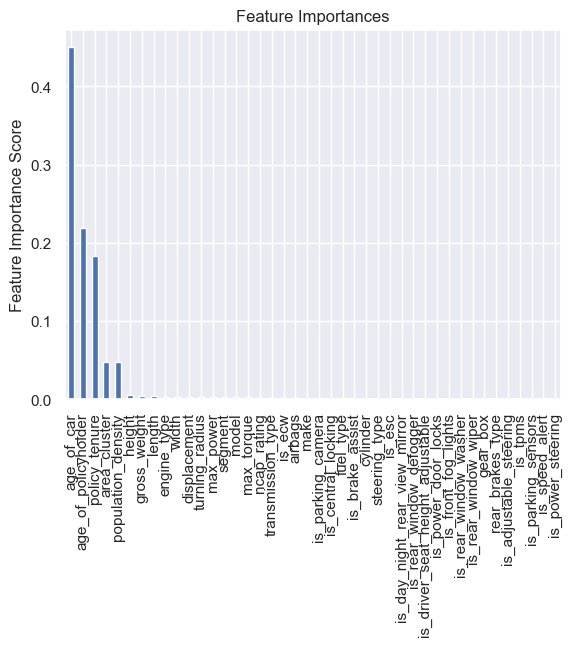

In [114]:
gbm = modelfit(gsearch3.best_estimator_, X_train, X_test, predictors)

In [116]:
infer_test_data(gbm, test_v1.drop('policy_id', axis=1))

[0 0 0 ... 0 0 0]
  policy_id  is_claim
0   ID58593         0
1   ID58594         0
2   ID58595         0
3   ID58596         0
4   ID58597         0
